In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**12. This problem is a continuation of the previous exercise. In a toy
example with p = 100, show that one can approximate the multiple
linear regressioncoefficient estimates by repeatedly performing simple
linear regression in a backfitting procedure. How many backfitting
iterations are required in order to obtain a “good” approximation to
the multiple regression coefficient estimates? Create a plot to justify
your answer.**

In [3]:
#这里注意n必须大于p，否则会陷入维数灾难，该题无法解出
np.random.seed(1)
X = np.random.normal(0.0, 1.0, 100000).reshape(1000,100)
beta_array = np.random.randint(-10,10,100)
epsilon = np.random.normal(0.0, 1.0, 1000)
beta_0 = 1
Y = beta_0 + beta_array.dot(X.T) + epsilon

In [4]:
def backfitting_loop(loop_times = 100):
    beta_hat_array = 100 * np.ones(101)
    column_list = []
    for p_num in range(101):
        column_list.append('beta{}'.format(p_num))
    beta_hat_pd = pd.DataFrame([],columns = column_list)
    for loop_time in range(loop_times):
        for p_num in range(100):
            a = Y - beta_hat_array[1:].dot(X.T) + beta_hat_array[p_num + 1] * X[:,p_num]
            X_model = sm.add_constant(X[:,p_num])
            beta_hat_array[p_num + 1] = sm.OLS(a,X_model).fit().params[1]
        beta_hat_array[0] = sm.OLS(a,X_model).fit().params[0]
        beta_hat_pd.loc[loop_time + 1] = beta_hat_array
    return beta_hat_pd
beta_hat_pd = backfitting_loop()

In [5]:
beta0_array = beta_hat_pd['beta0']
beta1_array = beta_hat_pd['beta1']
beta2_array = beta_hat_pd['beta2'] 
X_model = sm.add_constant(X)
beta0_ols = sm.OLS(Y,X_model).fit().params[0]
beta1_ols = sm.OLS(Y,X_model).fit().params[1]
beta2_ols = sm.OLS(Y,X_model).fit().params[2]

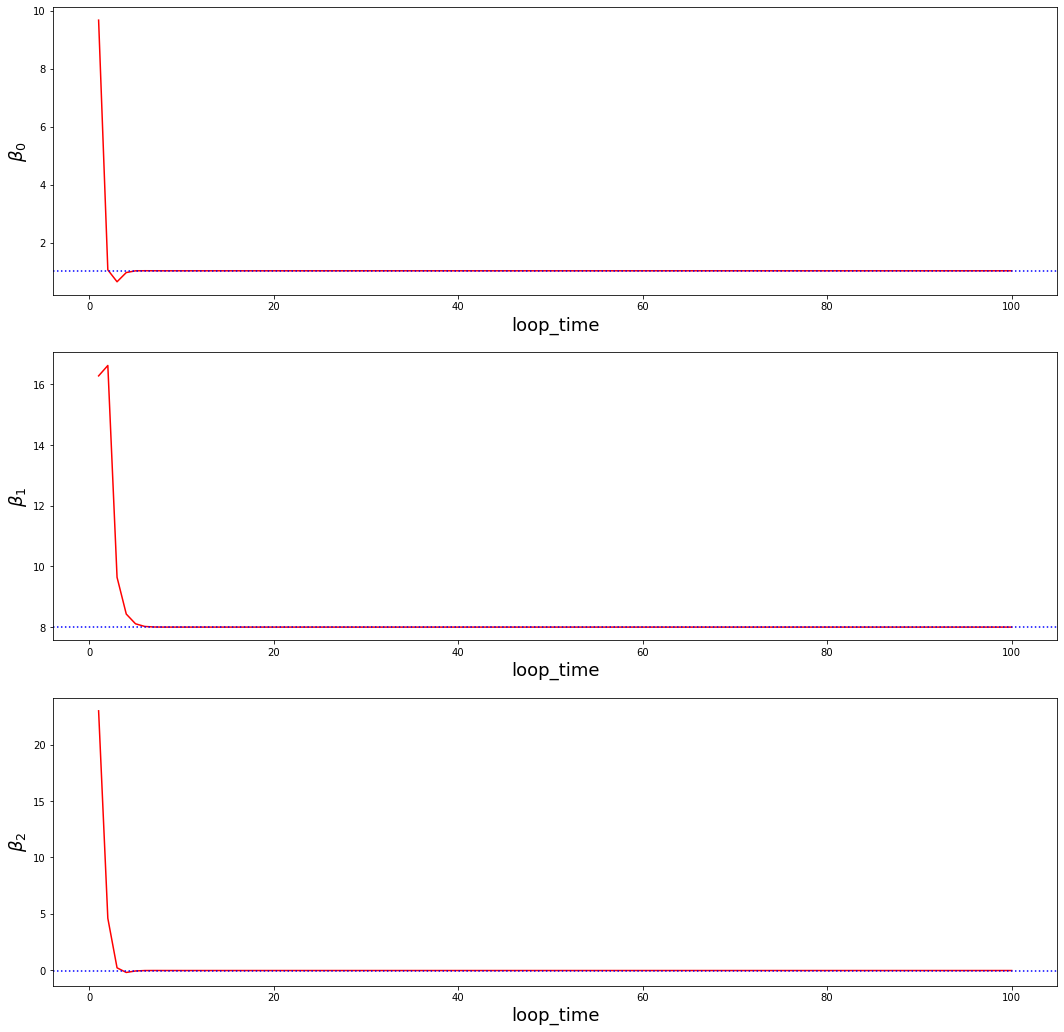

In [6]:
loop_times  = np.arange(1,101)
plt.figure(figsize=(18,18))
plt.subplot(311)
plt.plot(loop_times,beta0_array,'r-')
plt.axhline(beta0_ols,color = 'b',linestyle = ':')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_0$", fontsize=18)
plt.subplot(312)
plt.plot(loop_times,beta1_array,'r-')
plt.axhline(beta1_ols,color = 'b',linestyle = ':')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_1$", fontsize=18)
plt.subplot(313)
plt.plot(loop_times,beta2_array,'r-')
plt.axhline(beta2_ols,color = 'b',linestyle = ':')
plt.xlabel(u"loop_time", fontsize=18)
plt.ylabel(r"$\beta_2$", fontsize=18)
plt.show()

从图像看，应该在10次以内，系数估计即较好

In [7]:
beta_ols_array = sm.OLS(Y,X_model).fit().params
for loop_time in range(1,101):
    belta_max_bias = ((np.abs(beta_hat_pd.loc[loop_time].values - beta_ols_array)/beta_ols_array).max() * 100).round(3)
    print('第{}次迭代后的拟合系数最大偏差为：{}%'.format(loop_time,belta_max_bias))
    if belta_max_bias < 1:
        break

第1次迭代后的拟合系数最大偏差为：207330.442%
第2次迭代后的拟合系数最大偏差为：23237.99%
第3次迭代后的拟合系数最大偏差为：2066.204%
第4次迭代后的拟合系数最大偏差为：322.044%
第5次迭代后的拟合系数最大偏差为：111.268%
第6次迭代后的拟合系数最大偏差为：33.855%
第7次迭代后的拟合系数最大偏差为：9.096%
第8次迭代后的拟合系数最大偏差为：2.057%
第9次迭代后的拟合系数最大偏差为：0.418%
